In [1]:
#data libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

# Part One

In [5]:
data = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\train.csv')

## Exploratory Data Analysis

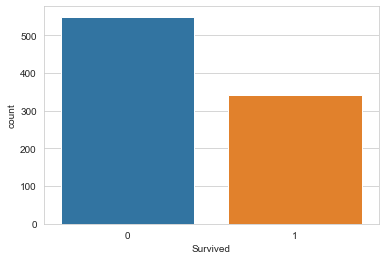

In [6]:
sns.countplot(data['Survived'])

### Analyzing the Pclass

In [7]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

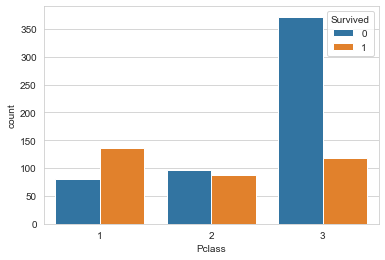

In [8]:
sns.countplot(data['Pclass'], hue = data['Survived'])

We can observe that there is relation between Passesenger Class & Survived. People of Class 3 Survived less

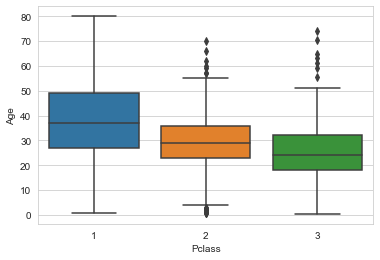

In [9]:
sns.boxplot(x = 'Pclass', y = 'Age', data= data)

We can observe that there is relation between Passesenger Class & Age. This can help us to plot out the age where it is missing data

### Name

In [10]:
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [11]:
data['name_length'] = data['Name'].apply(len)

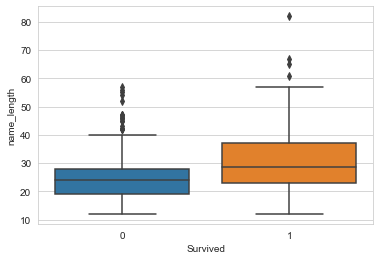

In [12]:
sns.boxplot(x = 'Survived', y = 'name_length', data =data)

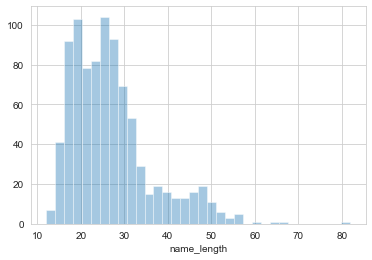

In [13]:
sns.distplot(data['name_length'], kde = False)

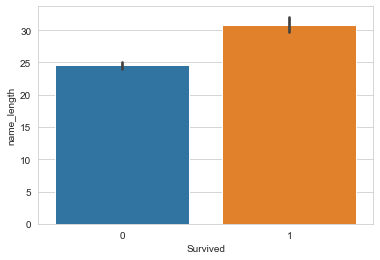

In [14]:
sns.barplot(x='Survived', y = 'name_length', data = data)

In [15]:
data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
name_length    0.332350
Name: Survived, dtype: float64

We have good corelation between survived and name_length

In [16]:
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [17]:
data['Name'][0].split(',')[1].split(' ')[1]

'Mr.'

In [18]:
data['name_designation'] = data['Name'].apply(lambda x : x.split(',')[1].split(' ')[1])

In [19]:
data['name_designation'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Capt.          1
Ms.            1
Don.           1
the            1
Lady.          1
Jonkheer.      1
Mme.           1
Sir.           1
Name: name_designation, dtype: int64

In [20]:
data['name_designation'] = data['name_designation'].map({'Dr.' : 'Professional','Rev.' : 'Professional','Major.' : 'Professional',
                                                        'Mlle.' : 'Professional','Col.' : 'Professional','the' : 'Professional',
                                                        'Sir.' : 'Professional','Capt.' : 'Professional','Lady' : 'Professional',
                                                        'Ms.' : 'Professional','Jonkheer.' : 'Professional','Mme.' : 'Professional',
                                                        'Don.' : 'Professional', 'Mr.' : 'Mr.', 'Miss.' : 'Miss.', 'Mrs.' : 'Mrs.',
                                                         'Master.' : 'Master.',})

In [21]:
data['name_designation'].value_counts()

Mr.             517
Miss.           182
Mrs.            125
Master.          40
Professional     26
Name: name_designation, dtype: int64

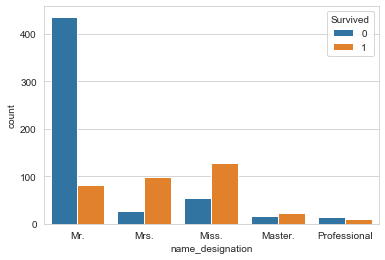

In [22]:
sns.countplot(data['name_designation'], hue= data['Survived'])

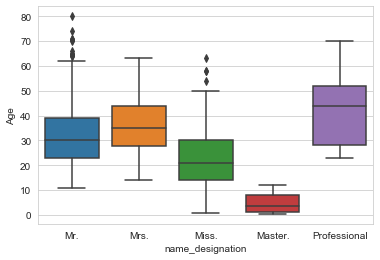

In [23]:
sns.boxplot(x = 'name_designation', y = 'Age', data = data)

In [24]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,name_designation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,16,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,23,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,30,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,49,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,35,Mrs.


### Sex

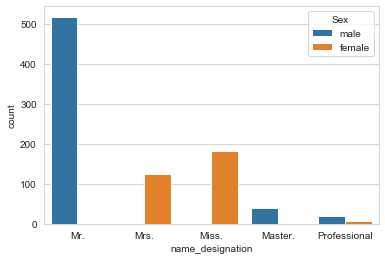

In [25]:
sns.countplot(data['name_designation'], hue= data['Sex'])

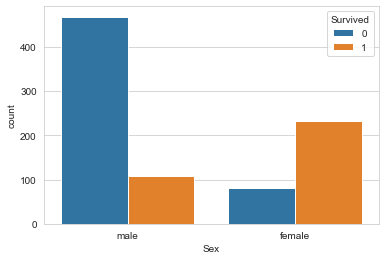

In [26]:
sns.countplot(data['Sex'], hue= data['Survived'])

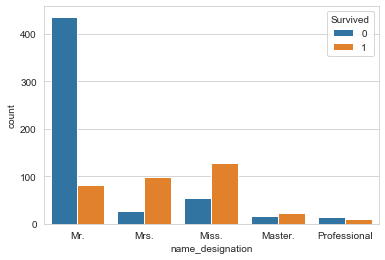

In [27]:
sns.countplot(data['name_designation'], hue= data['Survived'])

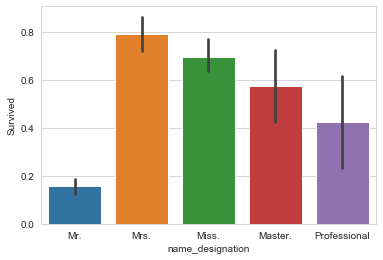

In [28]:
sns.barplot(x = data['name_designation'], y= data['Survived'])

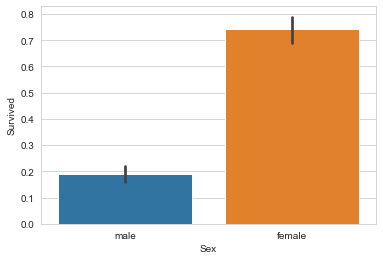

In [29]:
sns.barplot(x = data['Sex'], y= data['Survived'])

So Name designation provides a better and finer classification rather than just gender and woth a try to use it

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,name_designation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.


### Age

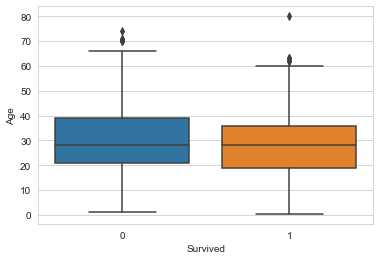

In [31]:
sns.boxplot(x = 'Survived', y = 'Age', data = data)

### SibSp

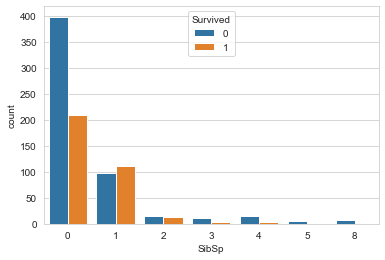

In [32]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = data)

In [33]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
data['having_SibSp'] = data['SibSp'].apply(lambda x : "No" if  x == 0 else "Yes")

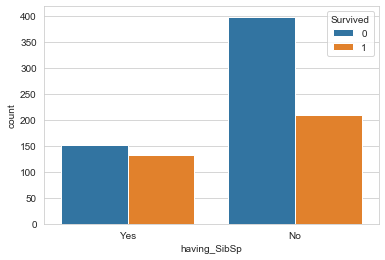

In [35]:
sns.countplot(x = 'having_SibSp', hue = 'Survived', data = data)

This feature provide us better picture of the data

### Parch

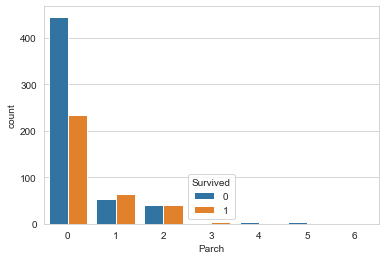

In [36]:
sns.countplot(x = 'Parch', hue = 'Survived', data = data)

In [37]:
data['having_Parch'] = data['Parch'].apply(lambda x : "No" if  x == 0 else "Yes")

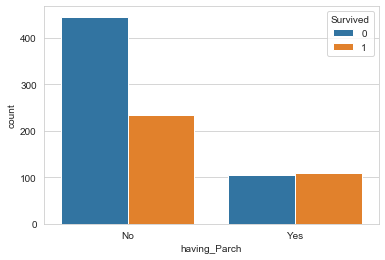

In [38]:
sns.countplot(x = 'having_Parch', hue = 'Survived', data = data)

### Ticket

In [39]:
data['Ticket'].value_counts()

1601             7
347082           7
CA. 2343         7
3101295          6
CA 2144          6
                ..
113050           1
234604           1
28424            1
347063           1
SC/PARIS 2149    1
Name: Ticket, Length: 681, dtype: int64

In [40]:
data['intial_Ticket'] = data['Ticket'].apply(lambda x: x[0])

In [41]:
data['intial_Ticket'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

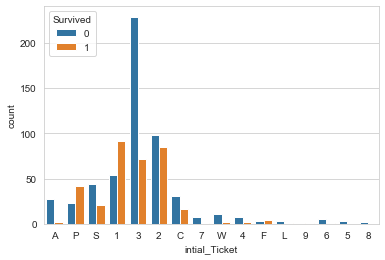

In [42]:
sns.countplot(data['intial_Ticket'], hue= data['Survived'])

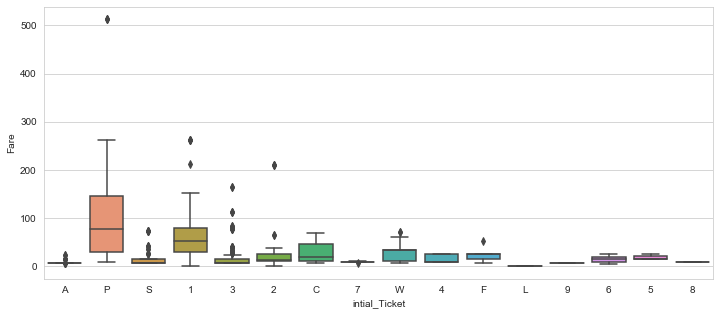

In [43]:
plt.figure(figsize= (12,5))
sns.boxplot(x = 'intial_Ticket', y = 'Fare', data =data)

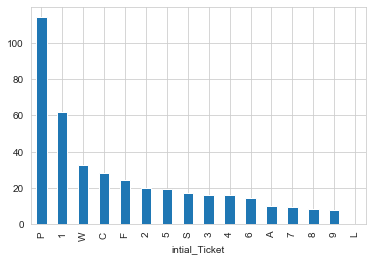

In [44]:
data.groupby('intial_Ticket').mean()['Fare'].sort_values(ascending= False).plot(kind = 'bar')

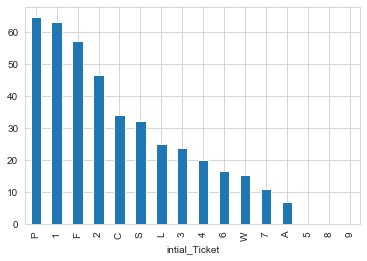

In [45]:
survive = data[data['Survived'] == 1].groupby('intial_Ticket').count()['Survived']
not_survive = data[data['Survived'] == 0].groupby('intial_Ticket').count()['Survived']
df = (survive * 100)/(survive + not_survive)
df.sort_values(ascending = False).plot(kind = 'bar')

It can be implied intial ticket number is direct indication of the fare

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  name_length       891 non-null    int64  
 13  name_designation  890 non-null    object 
 14  having_SibSp      891 non-null    object 
 15  having_Parch      891 non-null    object 
 16  intial_Ticket     891 non-null    object 
dt

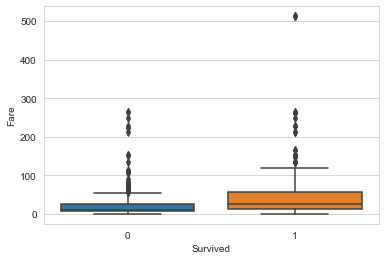

In [47]:
sns.boxplot(x = 'Survived', y = 'Fare', data=data)

### Embarked

In [48]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

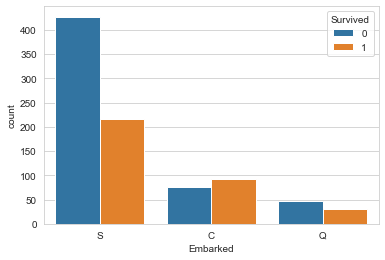

In [49]:
sns.countplot(data['Embarked'], hue = data['Survived'])

In [50]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.012986
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.332350
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832
name_length,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000


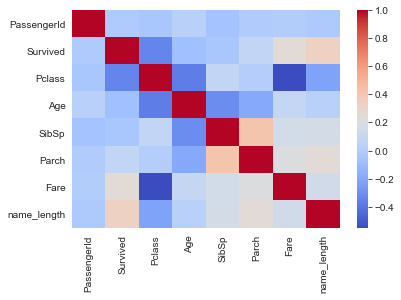

In [51]:
sns.heatmap(data.corr(), cmap= 'coolwarm')

In [52]:
data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
name_length    0.332350
Name: Survived, dtype: float64

## Data Cleaning & Preprocessing

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,name_designation,having_SibSp,having_Parch,intial_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.,Yes,No,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.,Yes,No,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,No,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.,Yes,No,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.,No,No,3


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  name_length       891 non-null    int64  
 13  name_designation  890 non-null    object 
 14  having_SibSp      891 non-null    object 
 15  having_Parch      891 non-null    object 
 16  intial_Ticket     891 non-null    object 
dt

In [55]:
data.groupby('name_designation').mean()['Age']

name_designation
Master.          4.574167
Miss.           21.773973
Mr.             32.368090
Mrs.            35.898148
Professional    42.160000
Name: Age, dtype: float64

In [56]:
#age imputation

def age_mapping(age, name_designation) :
    
    if age != age :
        
        if name_designation == 'Master' :
            return 4.6
        elif name_designation == 'Miss.' :
            return 21.8
        elif name_designation == 'Mr.' :
            return 32.4
        elif name_designation == 'Mrs' :
            return 35.9
        else :
            return 42.2
    else :
        return age
        

In [57]:
data['age_corrected'] = data.apply(lambda x: age_mapping(x.Age, x.name_designation), axis=1)

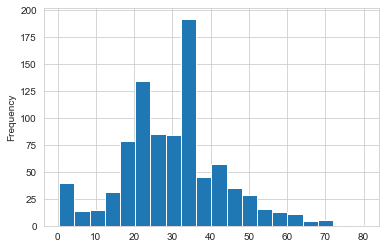

In [58]:
data['age_corrected'].plot(kind = 'hist', bins=20)

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,name_designation,having_SibSp,having_Parch,intial_Ticket,age_corrected
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.,Yes,No,A,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.,Yes,No,P,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,No,No,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.,Yes,No,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.,No,No,3,35.0


In [60]:
#dropping unneccasry columns

df = data.drop(['PassengerId', 'Name', 'name_designation', 'Age','SibSp', 'Parch', 'Ticket', 'Cabin', 'intial_Ticket'], axis=1)

In [61]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,name_length,having_SibSp,having_Parch,age_corrected
0,0,3,male,7.2500,S,23,Yes,No,22.0
1,1,1,female,71.2833,C,51,Yes,No,38.0
2,1,3,female,7.9250,S,22,No,No,26.0
3,1,1,female,53.1000,S,44,Yes,No,35.0
4,0,3,male,8.0500,S,24,No,No,35.0


In [62]:
#making Pclass a categorical feature

df['Pclass'] = df['Pclass'].map({1: 'First_Class',2: 'Second_Class',3: 'Third_Class',})

In [63]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,name_length,having_SibSp,having_Parch,age_corrected
0,0,Third_Class,male,7.2500,S,23,Yes,No,22.0
1,1,First_Class,female,71.2833,C,51,Yes,No,38.0
2,1,Third_Class,female,7.9250,S,22,No,No,26.0
3,1,First_Class,female,53.1000,S,44,Yes,No,35.0
4,0,Third_Class,male,8.0500,S,24,No,No,35.0


In [64]:
features = pd.get_dummies(df[['Pclass', 'Embarked', 'Sex', 'having_SibSp', 'having_Parch']], drop_first=True)
features.head()

,Pclass_Second_Class,Pclass_Third_Class,Embarked_Q,Embarked_S,Sex_male,having_SibSp_Yes,having_Parch_Yes
0,0,1,0,1,1,1,0
1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0
3,0,0,0,1,0,1,0
4,0,1,0,1,1,0,0


In [65]:
df = pd.concat([df.drop(['Pclass', 'Embarked', 'Sex', 'having_SibSp', 'having_Parch'], axis=1), features], axis=1)

In [66]:
df.head()

,Survived,Fare,name_length,age_corrected,Pclass_Second_Class,Pclass_Third_Class,Embarked_Q,Embarked_S,Sex_male,having_SibSp_Yes,having_Parch_Yes
0,0,7.2500,23,22.0,0,1,0,1,1,1,0
1,1,71.2833,51,38.0,0,0,0,0,0,1,0
2,1,7.9250,22,26.0,0,1,0,1,0,0,0
3,1,53.1000,44,35.0,0,0,0,1,0,1,0
4,0,8.0500,24,35.0,0,1,0,1,1,0,0


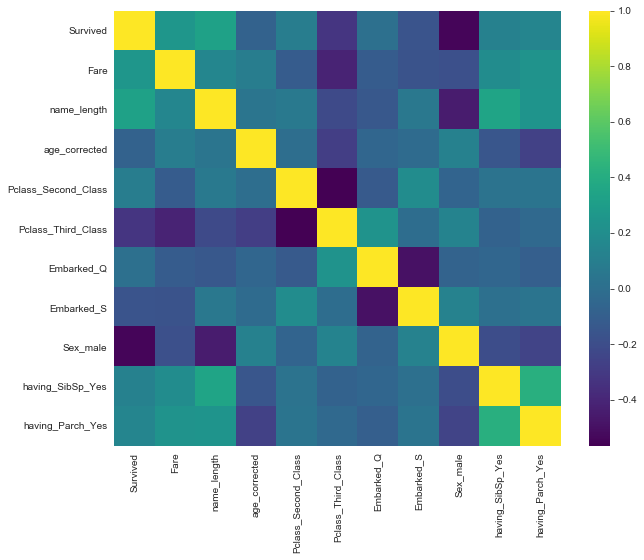

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap= 'viridis',)

In [68]:
df.corr()

,Survived,Fare,name_length,age_corrected,Pclass_Second_Class,Pclass_Third_Class,Embarked_Q,Embarked_S,Sex_male,having_SibSp_Yes,having_Parch_Yes
Survived,1.000000,0.257307,0.332350,-0.078053,0.093349,-0.322308,0.003650,-0.155660,-0.543351,0.115867,0.147408
Fare,0.257307,1.000000,0.155832,0.093613,-0.118557,-0.413333,-0.117216,-0.166603,-0.182333,0.192190,0.237717
name_length,0.332350,0.155832,1.000000,0.043138,0.068863,-0.212822,-0.140941,0.062817,-0.448759,0.349501,0.245209
age_corrected,-0.078053,0.093613,0.043138,1.000000,-0.005234,-0.279772,-0.052284,-0.026609,0.114598,-0.143818,-0.265552
Pclass_Second_Class,0.093349,-0.118557,0.068863,-0.005234,1.000000,-0.565210,-0.127301,0.192061,-0.064746,0.033099,0.039091
Pclass_Third_Class,-0.322308,-0.413333,-0.212822,-0.279772,-0.565210,1.000000,0.237449,-0.009511,0.137143,-0.077316,-0.039029
Embarked_Q,0.003650,-0.117216,-0.140941,-0.052284,-0.127301,0.237449,1.000000,-0.496624,-0.074115,-0.055398,-0.097467
Embarked_S,-0.155660,-0.166603,0.062817,-0.026609,0.192061,-0.009511,-0.496624,1.000000,0.125722,0.007822,0.035549
Sex_male,-0.543351,-0.182333,-0.448759,0.114598,-0.064746,0.137143,-0.074115,0.125722,1.000000,-0.203203,-0.247523
having_SibSp_Yes,0.115867,0.192190,0.349501,-0.143818,0.033099,-0.077316,-0.055398,0.007822,-0.203203,1.000000,0.420233


## Creating Train & Test Datasets

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,Fare,name_length,age_corrected,Pclass_Second_Class,Pclass_Third_Class,Embarked_Q,Embarked_S,Sex_male,having_SibSp_Yes,having_Parch_Yes
331,28.5000,19,45.5,0,0,0,1,1,0,0
733,13.0000,26,23.0,1,0,0,1,1,0,0
382,7.9250,18,32.0,0,1,0,1,1,0,0
704,7.8542,23,26.0,0,1,0,1,1,1,0
813,31.2750,34,6.0,0,1,0,1,0,1,1


In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
X_train = scaler.transform(X_train)

In [76]:
X_train

array([[0.0556283 , 0.1       , 0.56647399, ..., 1.        , 0.        ,
        0.        ],
       [0.02537431, 0.2       , 0.28373963, ..., 1.        , 0.        ,
        0.        ],
       [0.01546857, 0.08571429, 0.39683338, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.02753757, 0.15714286, 0.50992712, ..., 1.        , 1.        ,
        0.        ],
       [0.2342244 , 0.18571429, 0.17064589, ..., 0.        , 1.        ,
        1.        ],
       [0.15085515, 0.18571429, 0.25860769, ..., 1.        , 0.        ,
        1.        ]])

In [77]:
X_test = scaler.transform(X_test)

## Model Selection

Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
linear_regression = LinearRegression()

In [388]:
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
predict = linear_regression.predict(X_test)

In [390]:
#since this is a classifcation problem, we will slightly modify our predict values

predict = np.array([1 if x > 0.5 else 0 for x in predict])

In [391]:
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

In [292]:
from sklearn.metrics import confusion_matrix, classification_report

In [392]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [393]:
print(confusion_matrix(y_test, predict))

[[88 17]
 [21 53]]


### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [184]:
logistic_regression = LogisticRegression()
lda = LinearDiscriminantAnalysis()

In [186]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
predict_lg = logistic_regression.predict(X_test)

In [276]:
predict_train_lg = logistic_regression.predict(X_train)

In [278]:
print(classification_report(y_train, predict_train_lg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       392
           1       0.80      0.73      0.76       231

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623



In [195]:
print(classification_report(y_test, predict_lg))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [196]:
print(confusion_matrix(y_test, predict_lg))

[[136  21]
 [ 31  80]]


In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
param_grid = {'C': [0.1, 0.3, 1, 3, 10,30,100]}

In [199]:
grid = GridSearchCV(LogisticRegression(), param_grid, verbose= 3, cv= 5)

In [200]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.784, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.856, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.680, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.790, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.855, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.776, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.880, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.680, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.823, total=   0.0s
[CV] C=0.3 ...........................................................
[CV] ............................... C=0.3, score=0.831, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.776, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.880, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [201]:
grid.best_params_

{'C': 3}

In [202]:
predict_lg = grid.predict(X_test)

In [203]:
print(classification_report(y_test, predict_lg))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [204]:
print(confusion_matrix(y_test, predict_lg))

[[137  20]
 [ 30  81]]


### Linear Discriminant Analysis

In [205]:
predict_lda = lda.predict(X_test)

In [206]:
print(classification_report(y_test, predict_lda))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [207]:
print(confusion_matrix(y_test, predict_lda))

[[136  21]
 [ 31  80]]


### KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
error = []
for i in range(1,30) :
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    error.append(np.mean(predict != y_test))

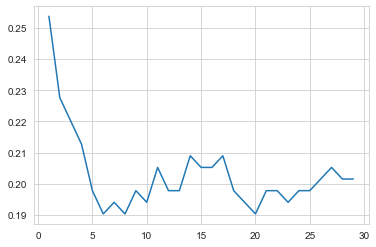

In [213]:
sns.lineplot(x = range(1,30), y = error)

In [224]:
knn = KNeighborsClassifier(n_neighbors= 6)

In [225]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [226]:
predict_knn = knn.predict(X_test)

In [227]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.87      0.64      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [228]:
print(confusion_matrix(y_test, predict_knn))

[[146  11]
 [ 40  71]]


### Trees & Random Forest

In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [460]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
predict = tree.predict(X_test)

In [461]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [462]:
print(confusion_matrix(y_test, predict))

[[87 18]
 [20 54]]


In [84]:
param_grid = {'n_estimators' : [100, 300, 500, 750,1000]}

In [464]:
grid= GridSearchCV(RandomForestClassifier(), param_grid= param_grid, cv= 5, verbose=5)

In [465]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.790, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.832, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.817, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.732, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.810, total=   0.2s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.783, total=   0.6s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.839, total=   0.9s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.817, total=   0.7s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.754, total=   1.2s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.824, total=   0.6s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.776, total=   1.0s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [466]:
grid.best_params_

{'n_estimators': 300}

In [467]:
predict_rnf = grid.predict(X_test)

In [468]:
print(classification_report(y_test, predict_rnf))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [469]:
print(confusion_matrix(y_test, predict_rnf))

[[93 12]
 [15 59]]


### Bagging

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [85]:
grid= GridSearchCV(BaggingClassifier(), param_grid= param_grid, cv= 5, verbose=5)

In [86]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.783, total=   0.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.832, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.761, total=   0.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.775, total=   0.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.789, total=   0.3s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.783, total=   1.1s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.832, total=   0.7s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.761, total=   0.8s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.761, total=   1.0s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.803, total=   0.8s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.783, total=   1.2s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   32.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [100, 300, 500, 750, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [921]:
grid.best_params_

{'n_estimators': 750}

In [92]:
X_train

array([[0.0556283 , 0.1       , 0.56647399, ..., 1.        , 0.        ,
        0.        ],
       [0.02537431, 0.2       , 0.28373963, ..., 1.        , 0.        ,
        0.        ],
       [0.01546857, 0.08571429, 0.39683338, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.02753757, 0.15714286, 0.50992712, ..., 1.        , 1.        ,
        0.        ],
       [0.2342244 , 0.18571429, 0.17064589, ..., 0.        , 1.        ,
        1.        ],
       [0.15085515, 0.18571429, 0.25860769, ..., 1.        , 0.        ,
        1.        ]])

In [90]:
predict_bagging = grid.predict(X_test)

In [88]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, predict_bagging))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [532]:
predict_test_set = grid.predict(test_set)

In [923]:
result = pd.DataFrame(data= predict_bagging, index= range(892,1310))

In [924]:
result.to_csv("Bagging_Output.txt")

### SVM

In [311]:
param_grid = {'C': [0.1, 0.3, 1, 3, 10,30,100], 'gamma' : [10, 3, 1, 0.3, 0.1, 0.03, 0.1]}

In [317]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, verbose= 3, cv= 5)

In [318]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.657, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.678, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.662, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.676, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.648, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ...................... C=0.1, gamma=3, score=0.762, total=   0.0s
[CV] C=0.1, gamma=3 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.796, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.789, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.852, total=   0.0s
[CV] C=0.1, gamma=0.3 ................................................
[CV] .................... C=0.1, gamma=0.3, score=0.832, total=   0.0s
[CV] C=0.1, gamma=0.3 ................................................
[CV] .................... C=0.1, gamma=0.3, score=0.818, total=   0.0s
[CV] C=0.1, gamma=0.3 ................................................
[CV] .................... C=0.1, gamma=0.3, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.3 ................................................
[CV] .................... C=0.1, gamma=0.3, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.3 ................................................
[CV] .

[CV] ....................... C=1, gamma=10, score=0.811, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.831, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.775, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.845, total=   0.0s
[CV] C=1, gamma=3 ....................................................
[CV] ........................ C=1, gamma=3, score=0.790, total=   0.0s
[CV] C=1, gamma=3 ....................................................
[CV] ........................ C=1, gamma=3, score=0.825, total=   0.0s
[CV] C=1, gamma=3 ....................................................
[CV] ........................ C=1, gamma=3, score=0.831, total=   0.0s
[CV] C=1, gamma=3 ....................................................
[CV] .

[CV] ...................... C=10, gamma=10, score=0.838, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.732, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.817, total=   0.0s
[CV] C=10, gamma=3 ...................................................
[CV] ....................... C=10, gamma=3, score=0.790, total=   0.0s
[CV] C=10, gamma=3 ...................................................
[CV] ....................... C=10, gamma=3, score=0.804, total=   0.0s
[CV] C=10, gamma=3 ...................................................
[CV] ....................... C=10, gamma=3, score=0.817, total=   0.0s
[CV] C=10, gamma=3 ...................................................
[CV] ....................... C=10, gamma=3, score=0.775, total=   0.0s
[CV] C=10, gamma=3 ...................................................
[CV] .

[CV] .................... C=30, gamma=0.03, score=0.825, total=   0.0s
[CV] C=30, gamma=0.03 ................................................
[CV] .................... C=30, gamma=0.03, score=0.839, total=   0.0s
[CV] C=30, gamma=0.03 ................................................
[CV] .................... C=30, gamma=0.03, score=0.810, total=   0.0s
[CV] C=30, gamma=0.03 ................................................
[CV] .................... C=30, gamma=0.03, score=0.775, total=   0.0s
[CV] C=30, gamma=0.03 ................................................
[CV] .................... C=30, gamma=0.03, score=0.824, total=   0.0s
[CV] C=30, gamma=0.1 .................................................
[CV] ..................... C=30, gamma=0.1, score=0.811, total=   0.0s
[CV] C=30, gamma=0.1 .................................................
[CV] ..................... C=30, gamma=0.1, score=0.839, total=   0.0s
[CV] C=30, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30, 100],
                         'gamma': [10, 3, 1, 0.3, 0.1, 0.03, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [319]:
grid.best_params_

{'C': 3, 'gamma': 0.3}

In [320]:
predict = grid.predict(X_test)

In [321]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Neural Network

In [394]:
X_train

array([[0.0556283 , 0.1       , 0.56647399, ..., 1.        , 0.        ,
        0.        ],
       [0.02537431, 0.2       , 0.28373963, ..., 1.        , 0.        ,
        0.        ],
       [0.01546857, 0.08571429, 0.39683338, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.02753757, 0.15714286, 0.50992712, ..., 1.        , 1.        ,
        0.        ],
       [0.2342244 , 0.18571429, 0.17064589, ..., 0.        , 1.        ,
        1.        ],
       [0.15085515, 0.18571429, 0.25860769, ..., 1.        , 0.        ,
        1.        ]])

In [395]:
y_train = y_train.values

In [396]:
y_test = y_test.values

In [329]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [397]:
X_train.shape

(712, 10)

In [543]:
model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.2))

#Binary Classification
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [544]:
model.fit(x= X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 822us/sample - loss: 0.7167 - val_loss: 0.6944
Epoch 2/100
712/712 [==============================] - 0s 72us/sample - loss: 0.6902 - val_loss: 0.6799
Epoch 3/100
712/712 [==============================] - 0s 70us/sample - loss: 0.6731 - val_loss: 0.6674
Epoch 4/100
712/712 [==============================] - 0s 72us/sample - loss: 0.6607 - val_loss: 0.6585
Epoch 5/100
712/712 [==============================] - 0s 77us/sample - loss: 0.6550 - val_loss: 0.6511
Epoch 6/100
712/712 [==============================] - 0s 80us/sample - loss: 0.6394 - val_loss: 0.6441
Epoch 7/100
712/712 [==============================] - 0s 79us/sample - loss: 0.6476 - val_loss: 0.6366
Epoch 8/100
712/712 [==============================] - 0s 84us/sample - loss: 0.6358 - val_loss: 0.6269
Epoch 9/100
712/712 [==============================] - 0s 69us/sample - loss: 0.6363 - val_loss: 0.6173
Epoch 10/100
712/

In [545]:
model_loss = pd.DataFrame(model.history.history)

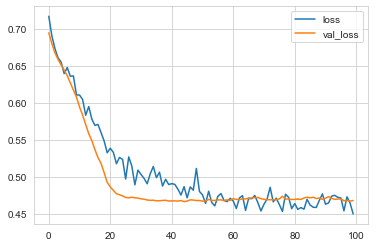

In [546]:
model_loss.plot()

In [402]:
predict = model.predict_classes(X_test)

In [403]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



## Creating output from Test Set

In [509]:
test_set = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\test.csv')

In [510]:
#test_set[test_set['Fare'].isna()]['Fare'] = 18
test_set.loc[152, 'Fare'] = 18

In [511]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [512]:
test_set['name_length'] = test_set['Name'].apply(len)

In [513]:
test_set['name_designation'] = test_set['Name'].apply(lambda x : x.split(',')[1].split(' ')[1])

In [514]:
test_set['name_designation'] = test_set['name_designation'].map({'Dr.' : 'Professional','Rev.' : 'Professional','Major.' : 'Professional',
                                                        'Mlle.' : 'Professional','Col.' : 'Professional','the' : 'Professional',
                                                        'Sir.' : 'Professional','Capt.' : 'Professional','Lady' : 'Professional',
                                                        'Ms.' : 'Professional','Jonkheer.' : 'Professional','Mme.' : 'Professional',
                                                        'Don.' : 'Professional', 'Mr.' : 'Mr.', 'Miss.' : 'Miss.', 'Mrs.' : 'Mrs.',
                                                         'Master.' : 'Master.',})

In [515]:
test_set['having_SibSp'] = test_set['SibSp'].apply(lambda x : "No" if  x == 0 else "Yes")

In [516]:
test_set['having_Parch'] = test_set['Parch'].apply(lambda x : "No" if  x == 0 else "Yes")

In [517]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,name_designation,having_SibSp,having_Parch
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,16,Mr.,No,No
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,32,Mrs.,Yes,No
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,25,Mr.,No,No
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,16,Mr.,No,No
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,44,Mrs.,Yes,Yes


In [518]:
# age corrected
test_set['age_corrected'] = test_set.apply(lambda x: age_mapping(x.Age, x.name_designation), axis=1)

In [519]:
#dropping unneccasry columns
test_set = test_set.drop(['PassengerId', 'Name', 'name_designation', 'Age','SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

#converting Pclass into categorical variable
test_set['Pclass'] = test_set['Pclass'].map({1: 'First_Class',2: 'Second_Class',3: 'Third_Class',})

#convering categorical features into numerical
features = pd.get_dummies(test_set[['Pclass', 'Embarked', 'Sex', 'having_SibSp', 'having_Parch']], drop_first=True)

test_set = pd.concat([test_set.drop(['Pclass', 'Embarked', 'Sex', 'having_SibSp', 'having_Parch'], axis=1), features], axis=1)

In [520]:
test_set.head()

,Fare,name_length,age_corrected,Pclass_Second_Class,Pclass_Third_Class,Embarked_Q,Embarked_S,Sex_male,having_SibSp_Yes,having_Parch_Yes
0,7.8292,16,34.5,0,1,1,0,1,0,0
1,7.0000,32,47.0,0,1,0,1,0,1,0
2,9.6875,25,62.0,1,0,1,0,1,0,0
3,8.6625,16,27.0,0,1,0,1,1,0,0
4,12.2875,44,22.0,0,1,0,1,0,1,1


In [523]:
test_set = test_set.values

In [524]:
test_set.shape

(418, 10)

In [538]:
test_set = scaler.fit_transform(test_set)

In [547]:
predictions = model.predict_classes(test_set)

In [548]:
result = pd.DataFrame(data=predictions, index= range(892,1310))

In [549]:
result.describe()

,0
count,418.00000
mean,0.27512
std,0.44711
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [550]:
result.head()

,0
892,0
893,0
894,0
895,0
896,0


In [551]:
result.to_csv('Output_Neural_Network.txt')

# Part Two

In [9]:
#Reading training data
titanic_train = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\train.csv')

#Reading test data
titanic_test = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\test.csv')

In [10]:
# Train set
titanic_train = titanic_train.drop(["PassengerId", "Ticket"], axis=1)

# For submission
submission = pd.DataFrame(columns=["PassengerId", "Survived"])
submission["PassengerId"] = titanic_test["PassengerId"]

# Test set
titanic_test = titanic_test.drop(["PassengerId", "Ticket"], axis=1)

In [11]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [12]:
def extract_title(name) :
    string = name.split(',')[1].split(' ')[1]
    if '.' in string :
        return string[:-1]
    else :
        return string

In [13]:
titanic_train['Title'] = titanic_train['Name'].apply(extract_title)
titanic_test['Title'] = titanic_test['Name'].apply(extract_title)

In [14]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [15]:
def get_title(title, sex) :
    
    if title not in ['Mr', 'Mrs', 'Master', 'Miss'] :
        
        if title == 'the' :
            #The Countess implies we can use Mrs can be used
            return 'Mrs'
        elif title == 'Jonkheer':
            #The Jonkheer implies we can use Mr can be used
            return 'Mr'
        elif title == 'Mlle':
            return 'Miss'
        elif title == 'Ms':
            return 'Miss'
        elif title == 'Lady':
            return 'Mrs'
        else :
            if sex == 'male' :
                return 'Mr'
            else :
                return 'Mrs'
    else:
        return title
        

In [16]:
titanic_train['Title'] = titanic_train.apply(lambda x : get_title(x.Title, x.Sex), axis=1)

In [17]:
titanic_train['Title'].value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64

In [18]:
titanic_test['Title'] = titanic_test.apply(lambda x : get_title(x.Title, x.Sex), axis=1)

In [19]:
titanic_test['Title'].value_counts()

Mr        245
Miss       79
Mrs        73
Master     21
Name: Title, dtype: int64

In [20]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [21]:
titanic_train.groupby('Title').mean()['Age']

Title
Master     4.574167
Miss      21.845638
Mr        32.984412
Mrs       35.991071
Name: Age, dtype: float64

In [22]:
def get_age(age, title) :
    
    if age != age :
        if title == 'Master' :
            return 5.00
        elif title == 'Miss'  :
            return 22.00
        elif title == 'Mr' :
            return 33.00
        else:
            return 36.00
    else :
        return age

In [23]:
titanic_train['Age'] = titanic_train.apply(lambda x : get_age(x.Age, x.Title), axis=1)
titanic_test['Age'] = titanic_test.apply(lambda x : get_age(x.Age, x.Title), axis=1)

In [24]:
titanic_test[titanic_test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S,Mr


In [25]:
titanic_train['Cabin'].fillna(' ', inplace= True)
titanic_test['Cabin'].fillna(' ', inplace= True)

In [26]:
titanic_train['Cabin_Intial'] = titanic_train['Cabin'].apply(lambda x : x[0])

In [27]:
titanic_test['Cabin_Intial'] = titanic_train['Cabin'].apply(lambda x : x[0])

In [28]:
titanic_train.groupby(['Pclass', 'Embarked', 'Cabin_Intial']).mean()['Fare']

Pclass  Embarked  Cabin_Intial
1       C                         102.376526
                  A                38.357743
                  B               145.964018
                  C                98.582533
                  D                85.586000
                  E                92.905840
        Q         C                90.000000
        S                          53.751986
                  A                40.731763
                  B                85.372283
                  C               101.630442
                  D                49.719906
                  E                46.448750
                  T                35.500000
2       C                          26.961667
                  D                13.333350
        Q                          12.350000
                  E                12.350000
        S                          20.421854
                  D                13.000000
                  E                11.333333
                  F     

The Fare should depend on the boarding point and passenger class

In [29]:
titanic_test.loc[152, 'Fare'] = 14.644

In [30]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Cabin         891 non-null    object 
 9   Embarked      889 non-null    object 
 10  Title         891 non-null    object 
 11  Cabin_Intial  891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [31]:
titanic_train[titanic_train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Cabin_Intial
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN,Miss,B
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN,Mrs,B


As we have already seen, there is relationship between Fare, Class & Embarked Point. We can conclude the point from the fare and class

In [32]:
titanic_train.loc[61, 'Embarked'] = 'S'
titanic_train.loc[829, 'Embarked'] = 'S'

## Feature Engineering

In [33]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Cabin_Intial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,,S,Mr,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,,S,Miss,
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,,S,Mr,


### Creating Family Feature

In [34]:
titanic_train['have_SibSp'] = titanic_train['SibSp'].apply(lambda x : 'Yes' if x > 0 else 'No')
titanic_test['have_SibSp'] = titanic_test['SibSp'].apply(lambda x : 'Yes' if x > 0 else 'No')

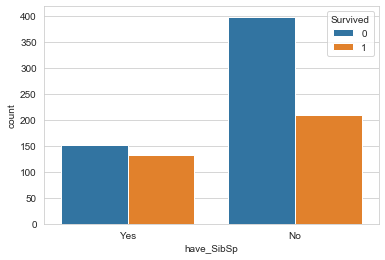

In [35]:
sns.countplot(titanic_train['have_SibSp'], hue= titanic_train['Survived'])

In [36]:
titanic_train['have_Parch'] = titanic_train['Parch'].apply(lambda x : 'Yes' if x > 0 else 'No')
titanic_test['have_Parch'] = titanic_test['Parch'].apply(lambda x : 'Yes' if x > 0 else 'No')

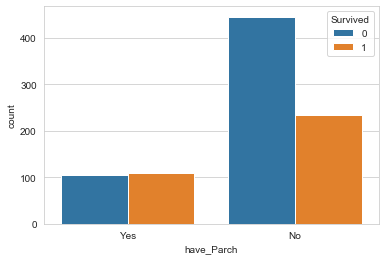

In [37]:
sns.countplot(titanic_train['have_Parch'], hue= titanic_train['Survived'], order= ['Yes', 'No'])

As can be observed, the impact of having Parch or SibSp can be concluded with one Parameter which is Family

In [38]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,,S,Mr,,Yes,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,C,Yes,No
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,,S,Miss,,No,No


In [39]:
titanic_train.drop(['SibSp', 'Parch'], axis=1, inplace= True)

In [40]:
titanic_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,,Q,Mr,,No,No
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,,S,Mrs,C,Yes,No
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,,Q,Mr,,No,No


In [41]:
titanic_test.drop(['SibSp', 'Parch'], axis=1, inplace= True)

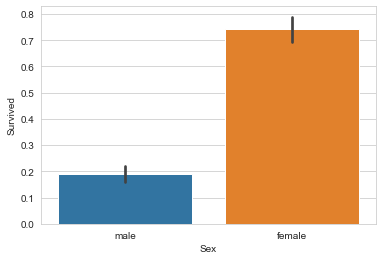

In [42]:
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_train)

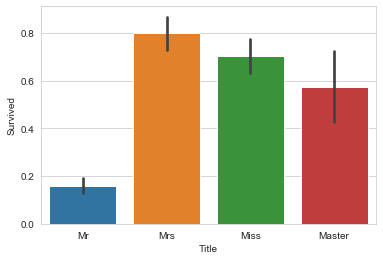

In [43]:
sns.barplot(x = 'Title', y = 'Survived', data=titanic_train)

Title provides the same data as Sex but at a finer level

In [44]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,,S,Mr,,Yes,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,Mrs,C,Yes,No
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,,S,Miss,,No,No


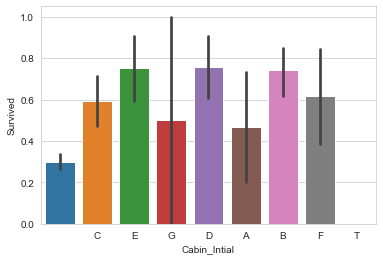

In [45]:
sns.barplot(x = 'Cabin_Intial', y = 'Survived', data=titanic_train)

In [46]:
titanic_train.groupby(['Pclass', 'Embarked', 'Cabin_Intial']).mean()[['Age', 'Fare']]

Age        Fare
Pclass Embarked Cabin_Intial                       
1      C                      36.684211  102.376526
                A             50.857143   38.357743
                B             35.500000  145.964018
                C             33.904762   98.582533
                D             41.545455   85.586000
                E             35.000000   92.905840
       Q        C             38.500000   90.000000
       S                      39.761905   53.751986
                A             35.125000   40.731763
                B             34.440000   84.942500
                C             36.706111  101.630442
                D             38.500000   49.719906
                E             41.150000   46.448750
                T             45.000000   35.500000
2      C                      23.233333   26.961667
                D             29.500000   13.333350
       Q                      43.500000   12.350000
                E             22.000000   12.350000
       S                      30.949205   20.421854
                D             35.000000   13.000000
                E             38.833333   11.333333
                F             16.687500   23.750000
3      C                      24.468000   11.042634
                F             22.000000   22.358300
       Q                      27.246479   11.231751
                F             33.000000    7.750000
       S                      26.749271   14.749523
                E             21.666667   11.000000
                F             28.666667    7.650000
                G             14.750000   13.581250

The impact of cabin seems to be a dervied effect of Pclass and Embarked

In [47]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,,S,Mr,,Yes,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,Mrs,C,Yes,No
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,,S,Miss,,No,No


In [48]:
titanic_test.head(3)

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,3,"Kelly, Mr. James",male,34.5,7.8292,,Q,Mr,,No,No
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,,S,Mrs,C,Yes,No
2,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,,Q,Mr,,No,No


In [49]:
titanic_train['Pclass'] = titanic_train['Pclass'].map({1 :'First', 2: 'Second', 3: 'Third'})
titanic_test['Pclass'] = titanic_test['Pclass'].map({1 :'First', 2: 'Second', 3: 'Third'})

In [50]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,7.2500,,S,Mr,,Yes,No
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,Mrs,C,Yes,No
2,1,Third,"Heikkinen, Miss. Laina",female,26.0,7.9250,,S,Miss,,No,No


In [51]:
titanic_train['Name_Length'] = titanic_train['Name'].apply(len)
titanic_test['Name_Length'] = titanic_test['Name'].apply(len)

In [52]:
features = pd.get_dummies(titanic_train[['Pclass', 'Embarked', 'Title','Sex', 'have_SibSp', 'have_Parch']], drop_first= True)
train_set = pd.concat([titanic_train.drop(['Pclass', 'Name', 'Sex', 'Cabin','Embarked','Cabin_Intial', 'Title', 'have_Parch' ,'have_SibSp'], axis=1), features], axis=1)

In [53]:
train_set.head(3)

,Survived,Age,Fare,Name_Length,Pclass_Second,Pclass_Third,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Sex_male,have_SibSp_Yes,have_Parch_Yes
0,0,22.0,7.2500,23,0,1,0,1,0,1,0,1,1,0
1,1,38.0,71.2833,51,0,0,0,0,0,0,1,0,1,0
2,1,26.0,7.9250,22,0,1,0,1,1,0,0,0,0,0


In [54]:
features = pd.get_dummies(titanic_test[['Pclass', 'Embarked', 'Title','Sex', 'have_SibSp', 'have_Parch']], drop_first= True)
test_set = pd.concat([titanic_test.drop(['Pclass', 'Name', 'Sex', 'Cabin','Embarked','Cabin_Intial', 'Title','have_SibSp', 'have_Parch'], axis=1), features], axis=1)

In [55]:
test_set.head(3)

,Age,Fare,Name_Length,Pclass_Second,Pclass_Third,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Sex_male,have_SibSp_Yes,have_Parch_Yes
0,34.5,7.8292,16,0,1,1,0,0,1,0,1,0,0
1,47.0,7.0000,32,0,1,0,1,0,0,1,0,1,0
2,62.0,9.6875,25,1,0,1,0,0,1,0,1,0,0


## Implementing Random Forest

In [56]:
X_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']
X_test = test_set

In [57]:
X_train.shape

(891, 13)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
min_max_scaler = MinMaxScaler()

In [60]:
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [61]:
X_train = min_max_scaler.transform(X_train)

In [62]:
X_test = min_max_scaler.transform(X_test)

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [80]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [81]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [82]:
predictions = rf_random.predict(X_test)

In [83]:
submission['Survived'] = predictions

In [84]:
submission.to_csv("Optimized_Random_Forest.txt", index= False)

## Bagging

In [61]:
bagging_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap}

In [62]:
X_train.shape

(891, 12)

In [63]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
bg_random = RandomizedSearchCV(estimator = bg, param_distributions = bagging_grid, n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1)

# Fit the random search model
bg_random.fit(X_train, y_train)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=1.0, n_estimators=10,
                                               n_jobs=None, oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pr

In [3]:
bg_random.best_params_

NameError: name 'bg_random' is not defined

In [65]:
predictions = bg_random.predict(X_test)

In [66]:
submission['Survived'] = predictions

In [67]:
submission.to_csv("Optimized_Bagging_scaled.txt", index= False)

## Neural Network

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.2))

#Binary Classification
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [68]:
y_train = y_train.values

In [69]:
model.fit(X_train, y_train, epochs = 100, verbose =3)

Train on 891 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100


In [70]:
model_loss = pd.DataFrame(model.history.history)

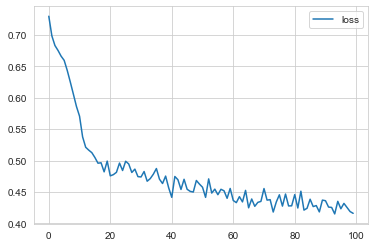

In [71]:
model_loss.plot()

In [75]:
predictions123 = model.predict_classes(X_test)

In [76]:
submission['Survived'] = predictions123

In [77]:
submission.to_csv("Neural Network.txt", index= False)

In [78]:
import xgboost as xgb

In [80]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [81]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [82]:
xg_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
preds = xg_clf.predict(X_test)

In [85]:
submission['Survived'] = preds

In [86]:
submission.to_csv("XG Boost.txt", index= False)

## Part 3

In [88]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Cabin_Intial,have_SibSp,have_Parch,Name_Length
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,7.2500,,S,Mr,,Yes,No,23
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,Mrs,C,Yes,No,51
2,1,Third,"Heikkinen, Miss. Laina",female,26.0,7.9250,,S,Miss,,No,No,22
